<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [ ]:
boston_df=pd.read_csv(boston_url)

# Task 1: Become familiar with the dataset

In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GRP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2: Generate Descriptive Statistics and Visualizations

## Q1 : For the "Median value of owner-occupied homes" provide a boxplot

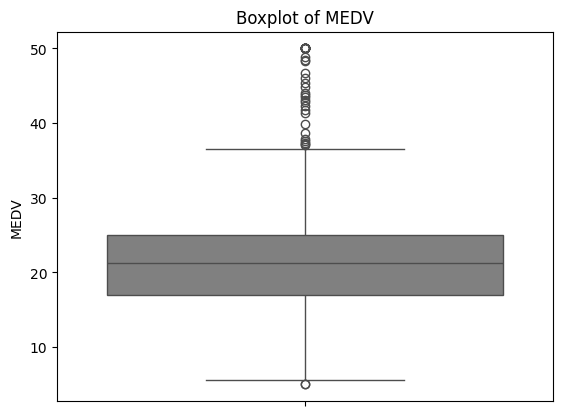

In [ ]:
sns.boxplot(y='MEDV', data = boston_df)
plt.title("Boxplot of MEDV")
plt.ylabel("MEDV")
plt.show()

## Q2 : Provide a  bar plot for the Charles river variable

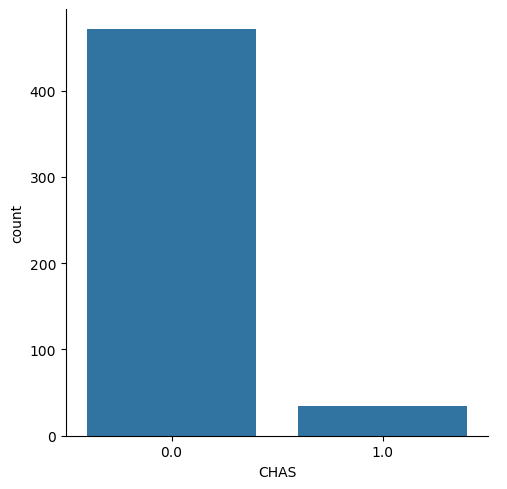

In [ ]:
sns.catplot(x='CHAS',kind='count', data=boston_df)
plt.show()

## Q3 : Provide a boxplot for the MEDV variable vs the AGE variable.

#### *(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)*

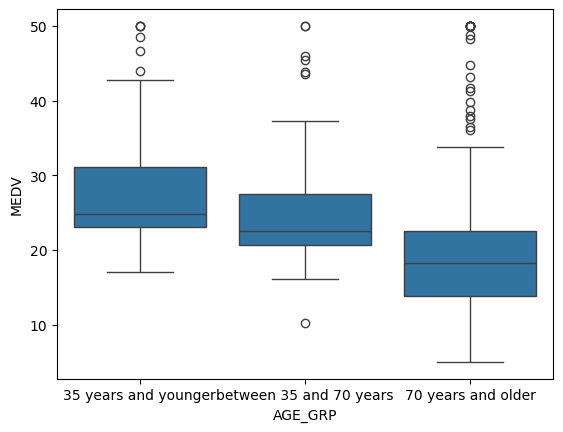

In [ ]:
# Discretizing AGE variable
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GRP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GRP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GRP'] = '70 years and older'
# Plotting Boxplot
sns.boxplot(x='AGE_GRP', y='MEDV', order = ['35 years and younger', 'between 35 and 70 years', '70 years and older'], data = boston_df)
plt.show()

## Q4 : Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

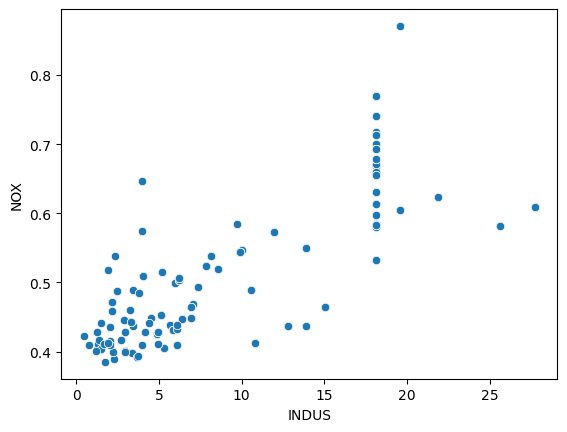

In [ ]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.show()

## Q5 : Create a histogram for the pupil to teacher ratio variable

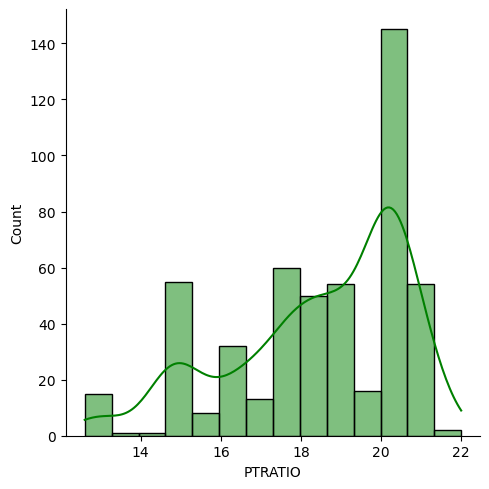

In [ ]:
sns.displot(boston_df['PTRATIO'], color='green', kde=True)
plt.show()

# Task 3: Use the appropriate tests to answer the questions provided.

## Q1 : Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

$H₀$ : No difference in MEDV between CHAS groups

$α$ = 0.05

In [ ]:
t_stat, p_value_tt = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                                        boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                                        equal_var = False)
print("P_value : ", p_value_tt)

P_value :  0.003567170098137517


$p = 0.00356 < 0.05$ → We reject the null hypothesis.

There is a statistically significant difference in median house values between houses near the Charles River and those not near it. Houses located near the river tend to have higher median values.

## Q2 : Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

$H₀$ : The average MEDV is the same across all AGE groups

$α$ = 0.05

In [ ]:
f_statistic_anova, p_value_anova = scipy.stats.f_oneway(boston_df[boston_df['AGE_GRP'] == '35 years and younger']['MEDV'],
                                            boston_df[boston_df['AGE_GRP'] == 'between 35 and 70 years']['MEDV'],
                                            boston_df[boston_df['AGE_GRP'] == '70 years and older']['MEDV'])
print("P-Value : ",p_value_anova)

P-Value :  1.7105011022702984e-15


$p < 0.05$ → We reject the null hypothesis.

There is a statistically significant difference in median house values between at least two age groups.

## Q3 : Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

$H₀$ : There is no linear correlation between NOX (nitric oxide concentration) and INDUS (percentage of industrial land).

$α$ = 0.05

In [ ]:
f_statistic_pearson, p_value_pearson = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS']) 
print("P-Value : ",p_value_pearson)

P-Value :  7.913361061210442e-98


$p < 0.05$ → We reject the null hypothesis.

There is a strong and statistically significant positive correlation between NOX and INDUS. This suggests that more industrial areas tend to have higher air pollution levels.

## Q4 : What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

$H₀$ : The distance to employment centers (DIS) has no effect on median house value (MEDV).

$α$ = 0.05

In [ ]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.21e-08
Time:                        15:54:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$p < 0.05$ → We reject the null hypothesis.

DIS has a statistically significant and positive effect on MEDV.
However, the R-squared value of 0.0625 indicates that DIS alone is statistically significant, but not a strong predictor on its own.

**Answer to the question :**

For each additional unit of distance, the median value of houses increases by about *$1091.6*

# Author
## Aymane BENCHAD